<a href="https://colab.research.google.com/github/zubairTalha683/SIM_Lab-4/blob/main/SIM_LAB_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Null Hypothesis (H0): μ1 = μ2
Alternative Hypothesis (H1): μ1 ≠ μ2
Variance assumption: Equal variances assumed (small samples, no evidence of heteroscedasticity)

Group 1 mean: 18.48
Group 2 mean: 20.30
Group 1 sample variance: 0.202
Group 2 sample variance: 0.025
Difference in means: -1.82
Calculated t-statistic: -8.54
Degrees of freedom: 8
Two-tailed p-value: 0.0000
95% CI for mean difference: [-2.31, -1.33]
Reject H0. There is significant evidence that the population means differ.


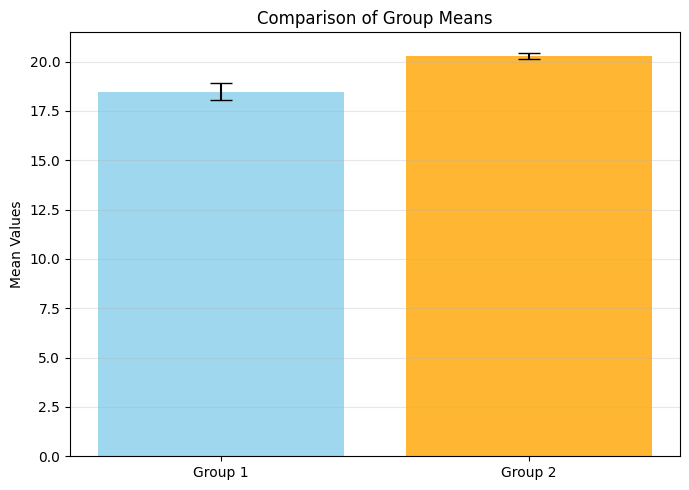

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Assignment data
sample1 = np.array([18.4, 19.1, 17.9, 18.7, 18.3])
sample2 = np.array([20.2, 20.5, 20.1, 20.3, 20.4])

# Task 1: State hypotheses and variance assumption
print("Null Hypothesis (H0): μ1 = μ2")
print("Alternative Hypothesis (H1): μ1 ≠ μ2")
print("Variance assumption: Equal variances assumed (small samples, no evidence of heteroscedasticity)")
print()

# Task 2: Calculate descriptive statistics
mean1 = np.mean(sample1)
mean2 = np.mean(sample2)
var1 = np.var(sample1, ddof=1)
var2 = np.var(sample2, ddof=1)
diff_means = mean1 - mean2

print(f"Group 1 mean: {mean1:.2f}")
print(f"Group 2 mean: {mean2:.2f}")
print(f"Group 1 sample variance: {var1:.3f}")
print(f"Group 2 sample variance: {var2:.3f}")
print(f"Difference in means: {diff_means:.2f}")

# Calculate sample sizes
size1 = len(sample1)
size2 = len(sample2)

# Compute pooled variance estimate
pooled_variance = ((size1 - 1) * var1 + (size2 - 1) * var2) / (size1 + size2 - 2)

# Calculate standard error of difference
se_diff = np.sqrt(pooled_variance * (1/size1 + 1/size2))

# Task 3: Perform t-test and get test statistics
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=True)
degrees_freedom = size1 + size2 - 2

print(f"Calculated t-statistic: {t_stat:.2f}")
print(f"Degrees of freedom: {degrees_freedom}")
print(f"Two-tailed p-value: {p_val:.4f}")

# Task 4: Calculate confidence interval for mean difference
confidence_level = 0.95
alpha_level = 1 - confidence_level
critical_t = stats.t.ppf(1 - alpha_level/2, degrees_freedom)
margin_of_error = critical_t * se_diff
ci_lower = diff_means - margin_of_error
ci_upper = diff_means + margin_of_error

print(f"95% CI for mean difference: [{ci_lower:.2f}, {ci_upper:.2f}]")

# Task 5: Make statistical decision
significance_level = 0.05
if p_val < significance_level:
    decision = "Reject H0. There is significant evidence that the population means differ."
else:
    decision = "Fail to reject H0. There is insufficient evidence that the population means differ."

print(decision)

# Create visualization
fig, ax = plt.subplots(figsize=(7, 5))
group_names = ['Group 1', 'Group 2']
means = [mean1, mean2]
std_devs = [np.std(sample1, ddof=1), np.std(sample2, ddof=1)]

bars = ax.bar(group_names, means, color=['skyblue', 'orange'], alpha=0.8)
ax.errorbar(group_names, means, yerr=std_devs, fmt='none', color='black', capsize=8)
ax.set_ylabel('Mean Values')
ax.set_title('Comparison of Group Means')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()